In [1]:
import os
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from dotenv import load_dotenv
load_dotenv()

from langchain_openai import ChatOpenAI

In [2]:
llm = ChatOpenAI()
llm.invoke("Hi!")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 9, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-C6scqb61OtDU0S3EuV2sXwJLLIHxV', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--ae6650e6-2804-46f8-8dd4-0db57cdf8803-0', usage_metadata={'input_tokens': 9, 'output_tokens': 9, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

### Graph State

In [3]:
class State(TypedDict):
    topic: str
    characters: str
    settings: str
    premises: str
    story_intro: str

#### Nodes Definitions

In [8]:
def generate_characters(state: State):
    """Generate character Descriptions"""
    msg = llm.invoke(f"Create two character names and brief traits for a story about {state['topic']}")
    return {
        'characters': msg.content
    }

In [5]:
def generate_setting(state: State):
    """Generate a story setting"""
    msg = llm.invoke(f"Describe a vivid for a story about {state['topic']}")
    return {
        'settings': msg.content
    }

In [6]:
def generate_premise(state: State):
    """Generate a story premise"""
    msg = llm.invoke(f"Write a one-sentence plot premise for a story about {state['topic']}")
    return {
        'premises': msg.content
    }

In [7]:
def combine_elements(state: State):
    """Combine characters, setting, and premise into an intro"""
    msg = llm.invoke(
        f"Write a short story introduction using these elements: \n"
        f"Characters: {state['characters']}\n"
        f"Setting: {state['settings']}"
        f"Premise: {state['premises']}"
    )
    
    return {
        'story_intro': msg.content
    }

### Build the Graph

In [9]:
graph = StateGraph(State)
graph.add_node('characters', generate_characters)
graph.add_node('setting', generate_setting)
graph.add_node('premise', generate_premise)
graph.add_node('combine', combine_elements)

In [10]:
graph.add_edge(START, 'characters')
graph.add_edge(START, 'setting')
graph.add_edge(START, 'premise')
graph.add_edge('characters', 'combine')
graph.add_edge('setting', 'combine')
graph.add_edge('premise', 'combine')

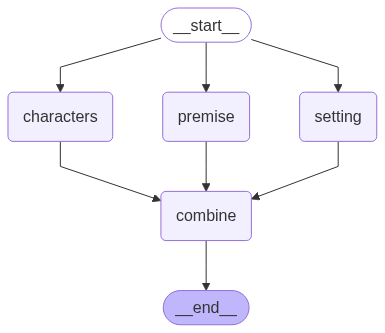

In [11]:
# Compile and run
compiled_graph = graph.compile()
graph_image = compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [12]:
initial_state = {
    'topic': "Time Travel!"
}

result = compiled_graph.invoke(initial_state)

result

{'topic': 'Time Travel!',
 'characters': "1. Evelyn Harper - A brilliant scientist who has dedicated her life to studying time travel. She is determined, analytical, and fiercely independent.\n\n2. Jack Bennett - A charming and adventurous daredevil who stumbles upon Evelyn's research. He is charismatic, quick-witted, and always seeking the next thrill.",
 'settings': "As the machine hummed and whirred, Sarah felt her heart race with excitement and fear. She stepped inside the sleek metal pod, her hands gripping the sides tightly as the door closed behind her. The scientist in charge of the experiment gave her a reassuring smile before flipping a switch and causing the room to spin and blur around her.\n\nSuddenly, everything went dark. Sarah felt like she was being pulled through a tunnel of swirling colors and patterns, her stomach lurching as she traveled through time and space. And then, with a jolt that made her gasp, the pod came to a stop.\n\nWhen Sarah opened her eyes, she foun

In [13]:
result['story_intro']

"Evelyn Harper had dedicated her entire life to the study of time travel, pouring over countless theories and experiments in her quest to unlock the secrets of the universe. And finally, after years of hard work and determination, she had succeeded in creating a functioning time machine.\n\nBut when the charming daredevil, Jack Bennett, stumbled upon her research, Evelyn's carefully laid plans were thrown into disarray. Jack's quick wit and adventurous spirit drew him to the machine like a moth to a flame, and before Evelyn could stop him, he had stepped inside and disappeared into the vortex of time.\n\nAs the machine hummed and whirred once again, Evelyn's heart raced with fear and excitement. She knew the dangers of altering the past, of the catastrophic consequences that could arise from even the smallest change. And now, with Jack lost somewhere in the depths of time, she had no choice but to follow him.\n\nWith a deep breath, Evelyn stepped inside the pod and braced herself for t